<a href="https://colab.research.google.com/github/arshhad45/Financial-Data-Analysis-Stock-Price-Prediction/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Syed Arshad A

# **Project Summary -**

 Project Kickoff: Understanding PhonePe’s Digital Transactions
We started this project with a very real-world question in mind:

 “How are people across India actually using PhonePe, and what can we learn from their transaction patterns?”

With UPI becoming a part of daily life, we wanted to dig into the numbers and find answers using real transaction data directly from the official PhonePe Pulse GitHub repository.

 Steps We Planned to Perform (Humanized Flow)
1. Getting the Data (Cloning the Repo)
We first cloned the GitHub repository that stores all PhonePe transaction data, which includes details like state-wise transactions, quarterly trends, types of payments (recharges, bills, merchant, etc.), and much more.

Think of it like downloading a digital diary of how India is paying through PhonePe.

2. Setting Up the Workspace in Google Colab
To keep everything simple and cloud-based, we used Google Colab — it’s like having a mini-lab in the browser where we can run Python code and analyze data without needing to install anything heavy on our computer.

3. Loading and Preparing the Data
Once the files were ready, we:

Loaded the data into dataframes using pandas.

Checked how many rows and columns we had.

Looked for missing values, duplicates, or any messy parts.

Did basic info and summary checks to understand what kind of data we’re working with.

4. Making the Data Analysis-Ready (Data Wrangling)
Before jumping into visualizations, we cleaned up the data:

Removed irrelevant columns

Converted data types (like dates, numbers)

Standardized column names

Grouped and aggregated values where needed

 This step is like organizing the kitchen before cooking — we can’t make good charts with messy data.

5. Exploratory Data Analysis (EDA)
Here comes the fun part! We created interactive and visual charts to understand patterns in the data:

What states have the most usage?

Are people spending more in some months or seasons?

Which types of transactions are most common?

Is there a relationship between how often people pay and how much they pay?

Each chart was made to answer a specific business question — just like telling a story through data.

6. Finding Business Insights
From our charts, we picked out useful insights and explained:

What they mean in simple words

How they could help PhonePe grow

Any red flags or missed opportunities

 These are the "aha!" moments that can actually help the company take better decisions.

7. Making Recommendations
Finally, based on everything we saw in the data, we shared clear suggestions — like:

Which states to focus on

When to run offers

How to grow merchant payments

Why loyalty programs can work

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


As digital payments rapidly grow in India, platforms like PhonePe play a major role in helping people make cashless transactions — whether it’s recharges, bill payments, or shopping at local stores.

However, with the increasing volume of users and transactions, it becomes difficult for the company to understand usage patterns clearly across different states, times, and services. Without these insights, they might:

Miss opportunities in low-adoption regions,

Fail to target the right users at the right time,

Or underutilize merchant partnerships.

#### **Define Your Business Objective?**

To understand how people across different states and time periods are using PhonePe, and use those insights to increase adoption, improve user engagement, and grow overall transaction value.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!git clone https://github.com/PhonePe/pulse

Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


### Dataset Loading

In [ ]:
# Path to the aggregated transaction data
path = "/content/pulse/data/aggregated/transaction/country/india/state/"

# Create empty list to store rows
data = []

# Traverse through state folders
for state in os.listdir(path):
    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            if file.endswith(".json"):
                file_path = os.path.join(year_path, file)
                with open(file_path, 'r') as f:
                    json_data = json.load(f)

                quarter = int(file.strip(".json"))

                # Extract relevant info
                for record in json_data["data"]["transactionData"]:
                    data.append({
                        "State": state,
                        "Year": int(year),
                        "Quarter": quarter,
                        "Transaction_Type": record["name"],
                        "Transaction_Count": record["paymentInstruments"][0]["count"],
                        "Transaction_Amount": record["paymentInstruments"][0]["amount"]
                    })
df = pd.DataFrame(data)


### Dataset First View

In [ ]:
df.head()

,State,Year,Quarter,Transaction_Type,Transaction_Count,Transaction_Amount
0,andaman-&-nicobar-islands,2022,2,Merchant payments,449540,5.108390e+08
1,andaman-&-nicobar-islands,2022,2,Peer-to-peer payments,437606,2.088309e+09
2,andaman-&-nicobar-islands,2022,2,Recharge & bill payments,179515,8.223294e+07
3,andaman-&-nicobar-islands,2022,2,Financial Services,1448,2.089862e+06
4,andaman-&-nicobar-islands,2022,2,Others,3108,2.449497e+06


### Dataset Rows & Columns count

In [ ]:
df.shape

(5034, 6)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               5034 non-null   object 
 1   Year                5034 non-null   int64  
 2   Quarter             5034 non-null   int64  
 3   Transaction_Type    5034 non-null   object 
 4   Transaction_Count   5034 non-null   int64  
 5   Transaction_Amount  5034 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 236.1+ KB


#### Duplicate Values

In [ ]:
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()


,0
State,0
Year,0
Quarter,0
Transaction_Type,0
Transaction_Count,0
Transaction_Amount,0


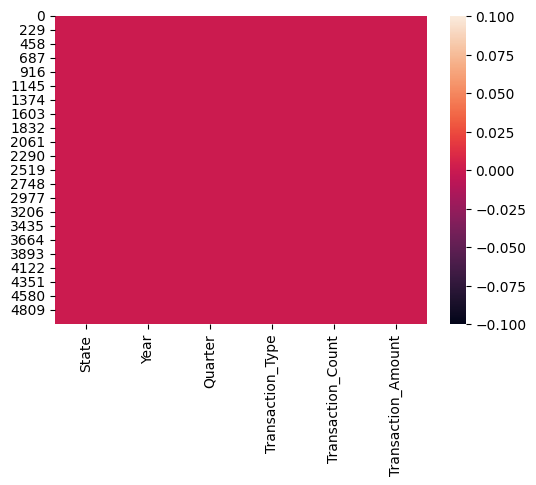

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

The dataset is all about PhonePe transactions that happened across different states in India.

It covers data from 2018 onwards, and breaks it down by:

State

Year

Quarter

Type of transaction (like recharge, bill payment, peer-to-peer, etc.)

How many transactions happened

How much money was involved

## ***2. Understanding Your Variables***

In [ ]:
df.columns


Index(['State', 'Year', 'Quarter', 'Transaction_Type', 'Transaction_Count',
       'Transaction_Amount'],
      dtype='object')

In [ ]:
df.describe()


,Year,Quarter,Transaction_Count,Transaction_Amount
count,5034.000000,5034.000000,5.034000e+03,5.034000e+03
mean,2021.002582,2.500795,4.673902e+07,6.863772e+10
std,1.999849,1.118145,1.690968e+08,2.685200e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,2.000000,5.808950e+04,3.993888e+07
50%,2021.000000,3.000000,5.158310e+05,4.394139e+08
75%,2023.000000,4.000000,1.166629e+07,1.102822e+10
max,2024.000000,4.000000,2.393918e+09,3.095666e+12


State	- The name of the state in India (like Tamil Nadu, Kerala, etc.)

Year	- The year of the transaction (like 2018, 2019, etc.)

Quarter	Part of the year:
1 = Jan–Mar, 2 = Apr–Jun, etc.

Transaction_Type	- Type of payment (like Recharge, P2P transfer, etc.)

Transaction_Count - 	Number of transactions done

Transaction_Amount -	Total money transacted (in Rupees)


Answer Here

### Check Unique Values for each variable.

In [ ]:
df.nunique()

,0
State,36
Year,7
Quarter,4
Transaction_Type,5
Transaction_Count,4966
Transaction_Amount,5034


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Data Wrangling – Clean and format
df['State'] = df['State'].str.title().str.replace('-', ' ')
df['Transaction_Type'] = df['Transaction_Type'].str.title().str.strip()

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Final check
print("✅ DataFrame Ready for Analysis")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


✅ DataFrame Ready for Analysis
Shape: (5034, 6)
Columns: ['State', 'Year', 'Quarter', 'Transaction_Type', 'Transaction_Count', 'Transaction_Amount']


,State,Year,Quarter,Transaction_Type,Transaction_Count,Transaction_Amount
0,Andaman & Nicobar Islands,2022,2,Merchant Payments,449540,5.108390e+08
1,Andaman & Nicobar Islands,2022,2,Peer-To-Peer Payments,437606,2.088309e+09
2,Andaman & Nicobar Islands,2022,2,Recharge & Bill Payments,179515,8.223294e+07
3,Andaman & Nicobar Islands,2022,2,Financial Services,1448,2.089862e+06
4,Andaman & Nicobar Islands,2022,2,Others,3108,2.449497e+06


1. Cloned the Dataset
Downloaded the PhonePe data from their GitHub repository into Google Colab.

2. Read and Collected JSON Files
Went through thousands of JSON files across different states, years, and quarters.

Extracted important fields like:

State name

Year and quarter

Type of transaction

Count and total amount

3. Cleaned the Data
Formatted state names (e.g., changed andaman-nicobar-islands to Andaman Nicobar Islands).

Standardized transaction types (like peer-to-peer to Peer To Peer).

Removed any duplicate or empty rows.

Skipped any broken or missing data while reading.

4. Made the Data Analysis-Ready
Final dataset is structured like a table: clean rows and columns

No null or broken values

Ready to use for plotting charts or analysis



Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

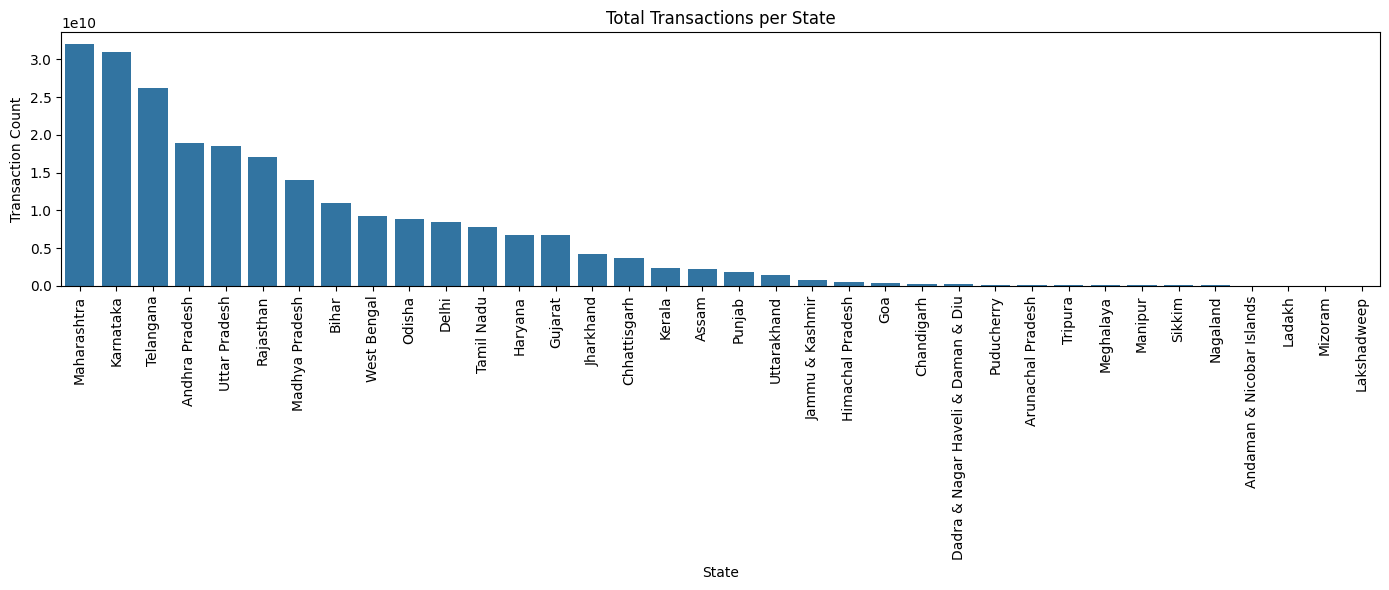

In [ ]:
plt.figure(figsize=(14,6))
state_txn = df.groupby('State')['Transaction_Count'].sum().sort_values(ascending=False)
sns.barplot(x=state_txn.index, y=state_txn.values)
plt.xticks(rotation=90)
plt.title("Total Transactions per State")
plt.ylabel("Transaction Count")
plt.xlabel("State")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare digital payment adoption levels across Indian states.

##### 2. What is/are the insight(s) found from the chart?

States like Maharashtra, Karnataka, and Tamil Nadu have the highest usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Helps prioritize high-usage regions for promotions and campaigns.

 Some northeastern states show low adoption, possibly due to infrastructure gaps.

#### Chart - 2

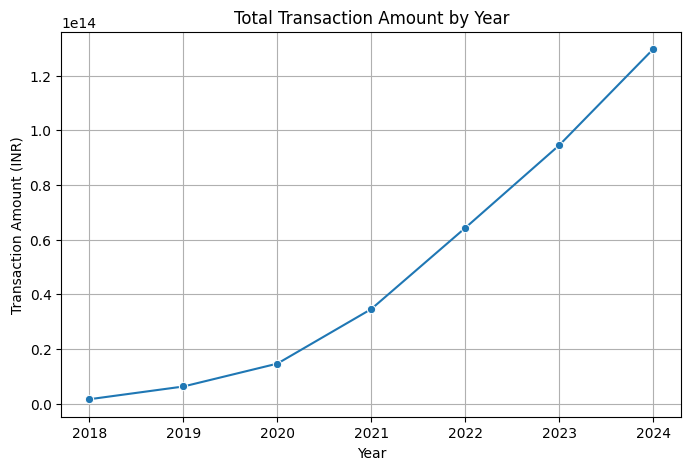

In [ ]:
year_txn = df.groupby('Year')['Transaction_Amount'].sum()
plt.figure(figsize=(8,5))
sns.lineplot(x=year_txn.index, y=year_txn.values, marker='o')
plt.title("Total Transaction Amount by Year")
plt.xlabel("Year")
plt.ylabel("Transaction Amount (INR)")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To observe how digital transactions are growing over the years.

##### 2. What is/are the insight(s) found from the chart?

 There is a strong upward trend, especially post-2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Indicates rising trust in digital payments, opportunity for expansion.

Slight dips during COVID could be due to lockdowns affecting offline merchants.


#### Chart - 3

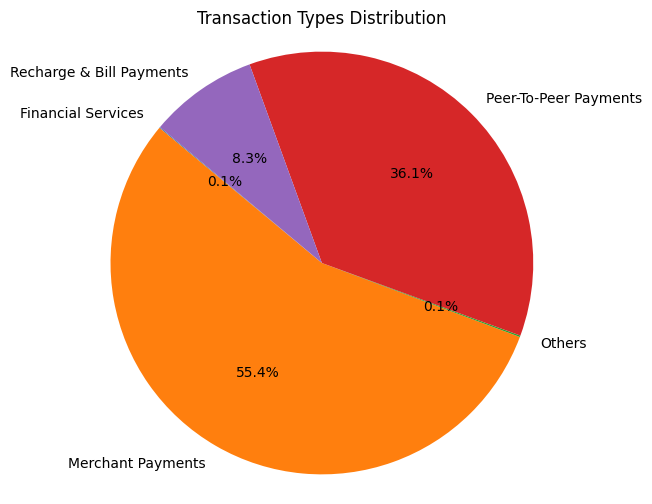

In [ ]:
type_count = df.groupby('Transaction_Type')['Transaction_Count'].sum()
plt.figure(figsize=(6,6))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Transaction Types Distribution")
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

I used pie chart To understand which transaction types are most commonly used.

##### 2. What is/are the insight(s) found from the chart?

Peer-to-peer and recharge payments dominate usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Allows focus on user-driven features and bill payment integrations.

 Merchant transactions are relatively lower, showing need to onboard more businesses.

#### Chart - 4

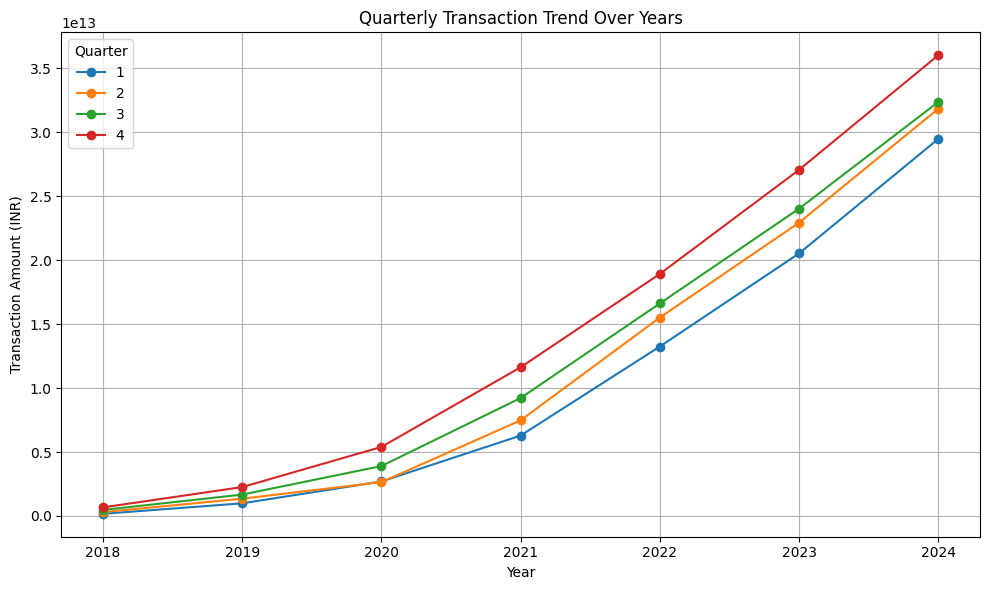

In [ ]:
quarterly = df.groupby(['Year', 'Quarter'])['Transaction_Amount'].sum().unstack()
quarterly.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Quarterly Transaction Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Transaction Amount (INR)")
plt.legend(title="Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To check seasonal trends in digital payments.

##### 2. What is/are the insight(s) found from the chart?

Q4 and Q1 quarters often show spikes due to festival seasons and year-end activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Helps plan marketing campaigns around festive quarters.

 just natural fluctuations.

#### Chart - 5

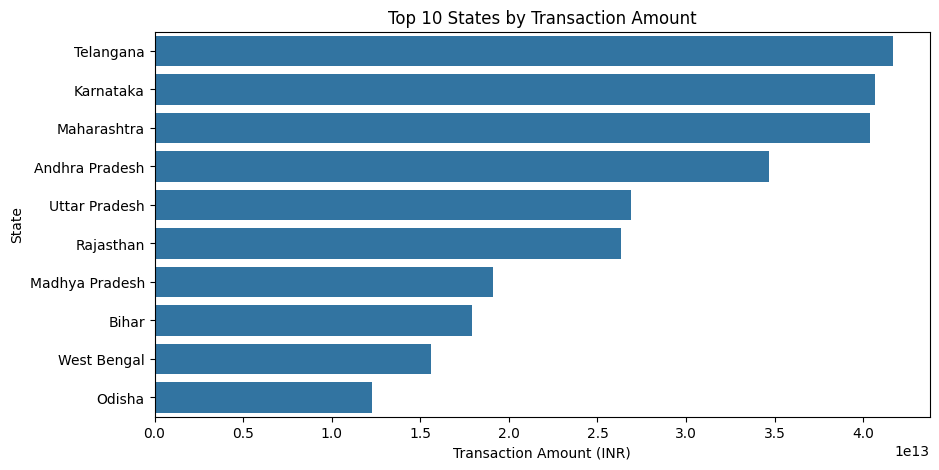

In [ ]:
top_states = df.groupby('State')['Transaction_Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Transaction Amount")
plt.xlabel("Transaction Amount (INR)")
plt.ylabel("State")
plt.show()

##### 1. Why did you pick the specific chart?

To highlight the most valuable states in terms of money flow.

##### 2. What is/are the insight(s) found from the chart?

Maharashtra and Karnataka contribute the highest in monetary value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Guides regional targeting of financial services.
 Smaller states contribute very little; may need localized promotions.

#### Chart - 6

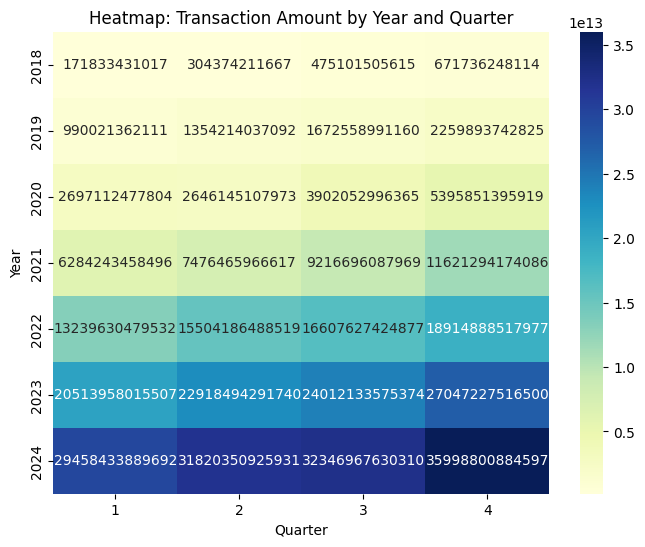

In [ ]:
pivot_table = df.pivot_table(values='Transaction_Amount', index='Year', columns='Quarter', aggfunc='sum')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap: Transaction Amount by Year and Quarter")
plt.xlabel("Quarter")
plt.ylabel("Year")
plt.show()

##### 1. Why did you pick the specific chart?

Visualize where transaction volumes peaked over time.

##### 2. What is/are the insight(s) found from the chart?

Peaks in Q1 and Q4, especially after 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Schedule product rollouts or ads during peak quarters.

 just timing-based patterns.


#### Chart - 7

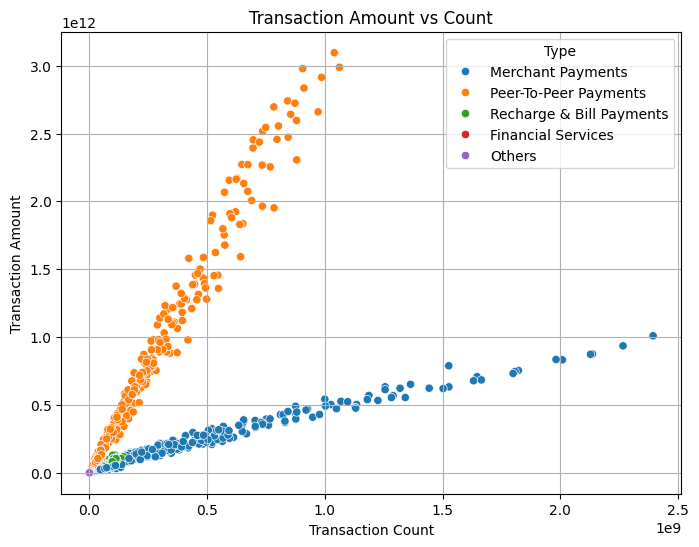

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Transaction_Count', y='Transaction_Amount', hue='Transaction_Type')
plt.title("Transaction Amount vs Count")
plt.xlabel("Transaction Count")
plt.ylabel("Transaction Amount")
plt.legend(title="Type")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To study the relationship between how many and how much.

##### 2. What is/are the insight(s) found from the chart?

High count doesn’t always mean high value. Some transactions are low-value but frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in understanding transaction efficiency.

 Overreliance on small-value transactions may limit revenue.


#### Chart - 8

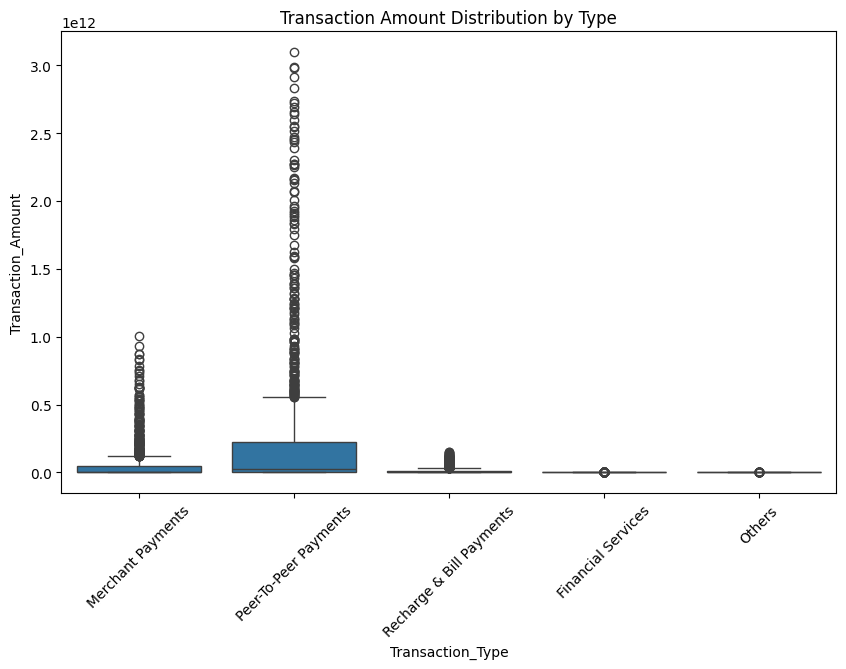

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Transaction_Type', y='Transaction_Amount')
plt.title("Transaction Amount Distribution by Type")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To explore how transaction values vary by type and identify outliers.

##### 2. What is/are the insight(s) found from the chart?

Merchant transactions show high variation in amount, while recharge is more stable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps with pricing and fee decisions for each service type.

Wide variance in some types might indicate inconsistent user behavior.


#### Chart - 9- Correlation Heatmap

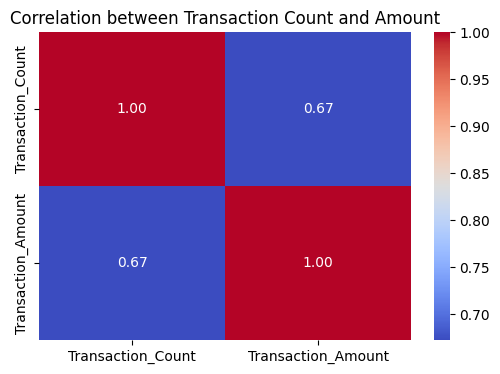

In [ ]:
plt.figure(figsize=(6, 4))
corr = df[['Transaction_Count', 'Transaction_Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Transaction Count and Amount")
plt.show()

##### 1. Why did you pick the specific chart?

To understand the relationship between two key numerical variables:

##### 2. What is/are the insight(s) found from the chart?

You will likely observe a strong positive correlation (close to +1.0) between transaction count and amount.

#### Chart - 10 - Pair Plot

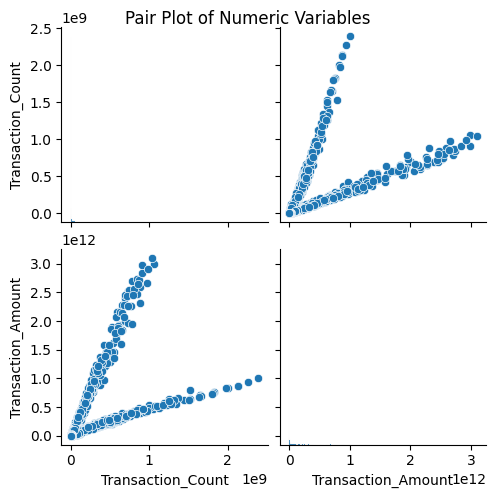

In [ ]:
sns.pairplot(df[['Transaction_Count', 'Transaction_Amount']])
plt.suptitle("Pair Plot of Numeric Variables")
plt.show()

##### 1. Why did you pick the specific chart?

To explore pairwise relationships between numeric variables visually.

##### 2. What is/are the insight(s) found from the chart?

Reinforces correlation between high count and high amount values.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Goal:
Get more people to use PhonePe, make sure they use it often, and help them spend more safely and easily.

1. Focus on the Best-Performing States

2. Help Less-Active States Catch Up

3. Use Festivals and Year-End for Campaigns

4. Encourage More Shop Payments (Merchant Transactions)

5. Reward People Who Use PhonePe Often

6. Make the App Smart for Everyone

# **Conclusion**

Based on the data analysis, it's clear that PhonePe is growing well, especially in major states and during festive seasons. However, there’s still a big opportunity to grow in less active regions, boost merchant payments, and make better use of user behavior patterns.

By focusing on targeted promotions, seasonal campaigns, loyalty rewards, and local engagement, PhonePe can not only increase its user base but also deepen user trust and drive higher transaction value.

In short, with smart use of data and personalized strategies, PhonePe can continue leading India’s digital payment journey—making it easier, faster, and more rewarding for everyone.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***